In [30]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
from astropy.visualization import make_lupton_rgb

In [2]:
hdul = fits.open("Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit")
hdul.info()

Filename: Datos/Light_NGC_1976_sloan_i_5.000secs_00000157.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      63   (4096, 4096)   int16 (rescales to uint16)   


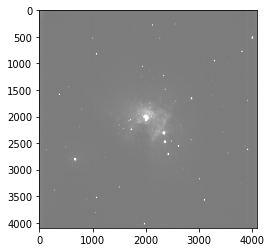

In [3]:
image= np.array(hdul[0].data)
plt.imshow(image,cmap="gray",vmax=np.mean(image)+np.std(image),vmin=np.mean(image)-np.std(image))

In [5]:
def Fits_Array(a):
    b=np.empty([4096,4096,0])
    for i in range(len(a)):
        x=fits.open(a[0])
        b=np.dstack((b,np.array(x[0].data)))
    return b

In [6]:
b=glob.glob('datos_OMA/BIAS*.fit')
d=glob.glob('datos_OMA/DARK_5*.fit')
fb=glob.glob('datos_OMA/FLAT_B*.fit')
fsg=glob.glob('datos_OMA/FLAT_sloan_g*.fit')
fsi=glob.glob('datos_OMA/FLAT_sloan_i*.fit')
fsr=glob.glob('datos_OMA/FLAT_sloan_r*fit')
fv=glob.glob('datos_OMA/FLAT_V*.fit')
Lb=glob.glob('datos_OMA/Light_NGC_1976_B*.fit')
Lsg=glob.glob('datos_OMA/Light_NGC_1976_sloan_g*.fit')
Lsi=glob.glob('datos_OMA/Light_NGC_1976_sloan_i*.fit')
Lsr=glob.glob('datos_OMA/Light_NGC_1976_sloan_r*.fit')
Lv=glob.glob('datos_OMA/Light_NGC_1976_v*.fit')
Lb2=glob.glob('datos_OMA/Light_NGC_104_B*.fit')
Lsg2=glob.glob('datos_OMA/Light_NGC_104_sloan_g*.fit')
Lsi2=glob.glob('datos_OMA/Light_NGC_104_sloan_i*.fit')
Lsr2=glob.glob('datos_OMA/Light_NGC_104_sloan_r*.fit')
Lv2=glob.glob('datos_OMA/Light_NGC_104_V*.fit')

In [7]:
Bias=Fits_Array(b)
Dark=Fits_Array(d)
FLAT_B=Fits_Array(fb)
FLAT_sloan_g=Fits_Array(fsg)
FLAT_sloan_i=Fits_Array(fsi)
FLAT_sloan_r=Fits_Array(fsr)
FLAT_V=Fits_Array(fv)

## Nebulosa de Orion ##

In [8]:
Light_B=Fits_Array(Lb)
Light_sloan_g=Fits_Array(Lsg)
Light_sloan_i=Fits_Array(Lsi)
Light_sloan_r=Fits_Array(Lsr)
Light_V=Fits_Array(Lv)

In [26]:
Master_Bias=np.mean(Bias,axis=2)
Master_Dark=np.mean(Dark,axis=2)
Dark_Bias=(Master_Bias+Master_Dark)/2
Master_Flat_B=np.mean(FLAT_B,axis=2)
Master_Flat_V=np.mean(FLAT_V,axis=2)
Master_Flat_sloan_g=np.mean(FLAT_sloan_g,axis=2)
Master_Flat_sloan_i=np.mean(FLAT_sloan_i,axis=2)
Master_Flat_sloan_r=np.mean(FLAT_sloan_r,axis=2)

In [27]:
Norm_Master_Flat_B=(Master_Flat_B-Dark_Bias)/(np.median(Master_Flat_B)-Dark_Bias)
Norm_Master_Flat_V=(Master_Flat_V-Dark_Bias)/(np.median(Master_Flat_V)-Dark_Bias)
Norm_Master_Flat_sloan_r=(Master_Flat_sloan_r-Dark_Bias)/(np.median(Master_Flat_sloan_r)-Dark_Bias)
Norm_Master_Flat_sloan_i=(Master_Flat_sloan_i-Dark_Bias)/(np.median(Master_Flat_sloan_i)-Dark_Bias)
Norm_Master_Flat_sloan_g=(Master_Flat_sloan_g-Dark_Bias)/(np.median(Master_Flat_sloan_g)-Dark_Bias)

In [21]:
Raw_Orion_B=np.mean(Light_B,axis=2)
Raw_Orion_V=np.mean(Light_V,axis=2)
Raw_Orion_sloan_i=np.mean(Light_sloan_i,axis=2)
Raw_Orion_sloan_g=np.mean(Light_sloan_g,axis=2)
Raw_Orion_sloan_r=np.mean(Light_sloan_r,axis=2)

In [28]:
Orion_B=(Raw_Orion_B-Dark_Bias)/Norm_Master_Flat_B
Orion_V=(Raw_Orion_V-Dark_Bias)/Norm_Master_Flat_V
Orion_sloan_r=(Raw_Orion_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r
Orion_sloan_i=(Raw_Orion_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Orion_sloan_g=(Raw_Orion_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g

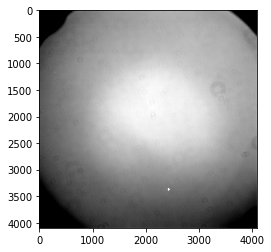

In [46]:
plt.imshow(FLAT_B[:,:,1],cmap='gray',vmax=FLAT_B[:,:,1].mean()+FLAT_B[:,:,1].std(),vmin=FLAT_B[:,:,1].mean()-FLAT_B[:,:,1].std())

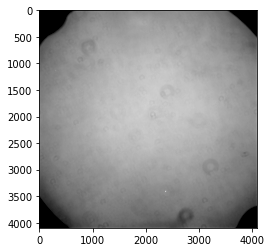

In [85]:
plt.imshow(Norm_Master_Flat_V,cmap='gray',vmax=Norm_Master_Flat_V.mean()+Norm_Master_Flat_V.std(),vmin=Norm_Master_Flat_V.mean()-Norm_Master_Flat_V.std())


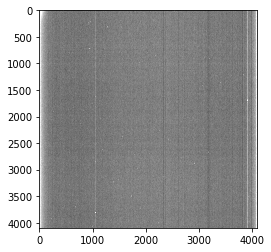

In [15]:
plt.imshow(Dark_Bias,cmap='gray',vmax=Dark_Bias.mean()+Dark_Bias.std(),vmin=Dark_Bias.mean()-Dark_Bias.std())

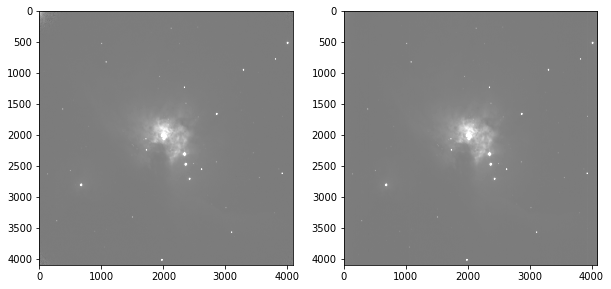

In [133]:
fig,ax=plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(Orion_V,cmap='gray',vmax=Orion_V.mean()+Orion_V.std(),vmin=Orion_V.mean()-Orion_V.std())
ax[1].imshow(Light_V[:,:,1],cmap='gray',vmin=Light_V[:,:,1].mean()-Light_V[:,:,1].std(),vmax=Light_V[:,:,1].mean()+Light_V[:,:,1].std())

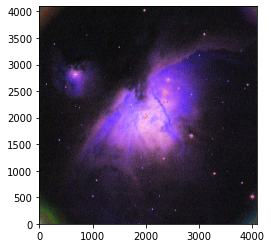

In [101]:
Orion_RGB1=make_lupton_rgb(Orion_sloan_r,Orion_V,Orion_sloan_g,minimum=,Q=5,stretch=1,filename='Orion1.jpeg')
plt.imshow(Orion_RGB1,origin='lower')

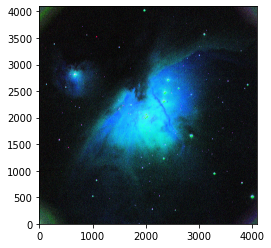

In [95]:
Orion_RGB2=make_lupton_rgb(Orion_sloan_i,Orion_sloan_r,Orion_sloan_g,minimum=9,Q=5,stretch=1,filename='Orion2.jpeg')
plt.imshow(Orion_RGB2,origin='lower')

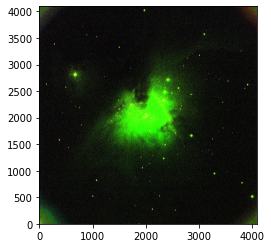

In [96]:
Orion_RGB3=make_lupton_rgb(Orion_sloan_i,Orion_V,Orion_B,minimum=9,Q=5,stretch=1,filename='Orion3.jpeg')
plt.imshow(Orion_RGB3,origin='lower')

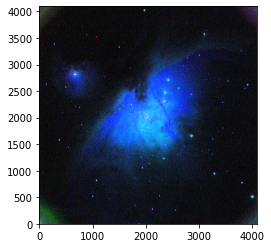

In [97]:
Orion_RGB4=make_lupton_rgb(Orion_sloan_i,Orion_V,Orion_sloan_g,minimum=9,Q=5,stretch=1,filename='Orion4.jpeg')
plt.imshow(Orion_RGB4,origin='lower')

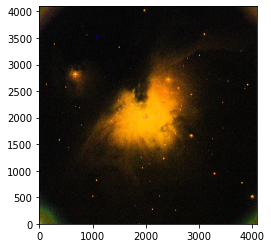

In [98]:
Orion_RGB5=make_lupton_rgb(Orion_sloan_r,Orion_V,Orion_B,minimum=10,Q=5,stretch=1,filename='Orion5.jpeg')
plt.imshow(Orion_RGB5,origin='lower')

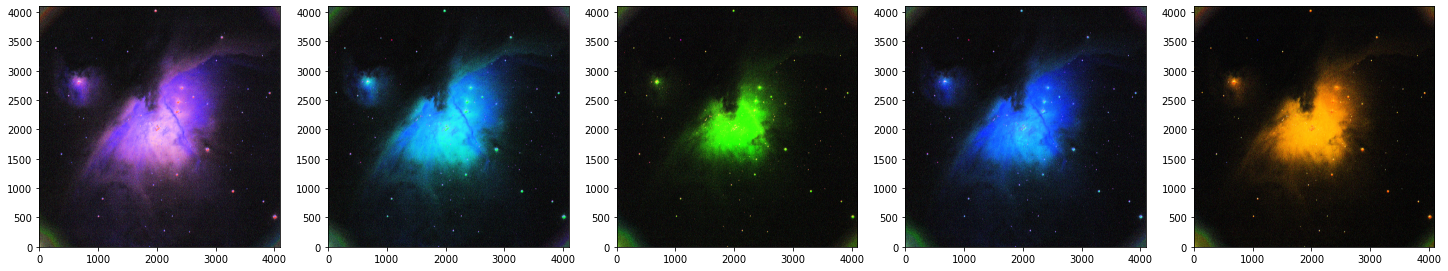

In [131]:
fig,ax=plt.subplots(1,5,figsize=(25,25))

ax[0].imshow(Orion_RGB1,origin='lower')
ax[1].imshow(Orion_RGB2,origin='lower')
ax[2].imshow(Orion_RGB3,origin='lower')
ax[3].imshow(Orion_RGB4,origin='lower')
ax[4].imshow(Orion_RGB5,origin='lower')

## 47 Tucanae ##

In [9]:
Light_B2=Fits_Array(Lb2)
Light_sloan_g2=Fits_Array(Lsg2)
Light_sloan_i2=Fits_Array(Lsi2)
Light_sloan_r2=Fits_Array(Lsr2)
Light_V2=Fits_Array(Lv2)

In [64]:
Raw_Tuca_B=np.mean(Light_B2,axis=2)
Raw_Tuca_V=np.mean(Light_V2,axis=2)
Raw_Tuca_sloan_i=np.mean(Light_sloan_i2,axis=2)
Raw_Tuca_sloan_g=np.mean(Light_sloan_g2,axis=2)
Raw_Tuca_sloan_r=np.mean(Light_sloan_r2,axis=2)

In [65]:
Tuca_B=(Raw_Tuca_B-Dark_Bias)/Norm_Master_Flat_B
Tuca_V=(Raw_Tuca_V-Dark_Bias)/Norm_Master_Flat_V
Tuca_sloan_r=(Raw_Tuca_sloan_r-Dark_Bias)/Norm_Master_Flat_sloan_r
Tuca_sloan_i=(Raw_Tuca_sloan_i-Dark_Bias)/Norm_Master_Flat_sloan_i
Tuca_sloan_g=(Raw_Tuca_sloan_g-Dark_Bias)/Norm_Master_Flat_sloan_g

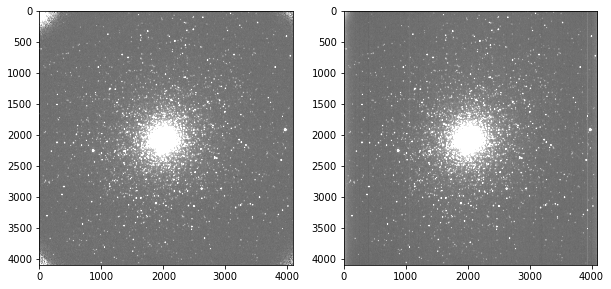

In [70]:
fig,ax=plt.subplots(1,2,figsize=(10,10))

ax[0].imshow(Tuca_V,cmap='gray',vmax=Tuca_V.mean()+Tuca_V.std(),vmin=Tuca_V.mean()-Tuca_V.std())
ax[1].imshow(Light_V2[:,:,1],cmap='gray',vmin=Light_V2[:,:,1].mean()-Light_V2[:,:,1].std(),vmax=Light_V2[:,:,1].mean()+Light_V2[:,:,1].std())

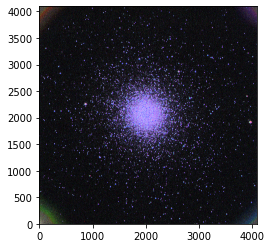

In [102]:
Tuca_RGB1=make_lupton_rgb(Tuca_sloan_r,Tuca_V,Tuca_sloan_g,minimum=9,Q=5,stretch=1,filename='Tucanae.jpeg')
plt.imshow(Tuca_RGB1,origin='lower')

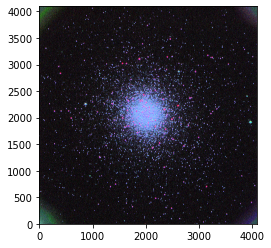

In [78]:
Tuca_RGB2=make_lupton_rgb(Tuca_sloan_i,Tuca_sloan_r,Tuca_sloan_g,minimum=9,Q=5,stretch=1,filename='Tucanae2.jpeg')
plt.imshow(Tuca_RGB2,origin='lower')

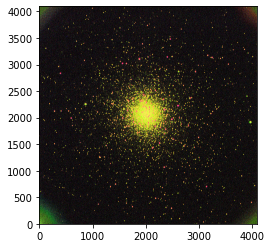

In [103]:
Tuca_RGB3=make_lupton_rgb(Tuca_sloan_i,Tuca_V,Tuca_B,minimum=9,Q=5,stretch=1,filename='Tucanae3.jpeg')
plt.imshow(Tuca_RGB3,origin='lower')

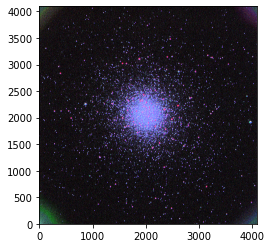

In [104]:
Tuca_RGB4=make_lupton_rgb(Tuca_sloan_i,Tuca_V,Tuca_sloan_g,minimum=9,Q=5,stretch=1,filename='Tucanae4.jpeg')
plt.imshow(Tuca_RGB4,origin='lower')

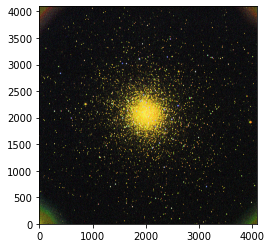

In [105]:
Tuca_RGB5=make_lupton_rgb(Tuca_sloan_r,Tuca_V,Tuca_B,minimum=9,Q=5,stretch=1,filename='Tucanae3.jpeg')
plt.imshow(Tuca_RGB5,origin='lower')

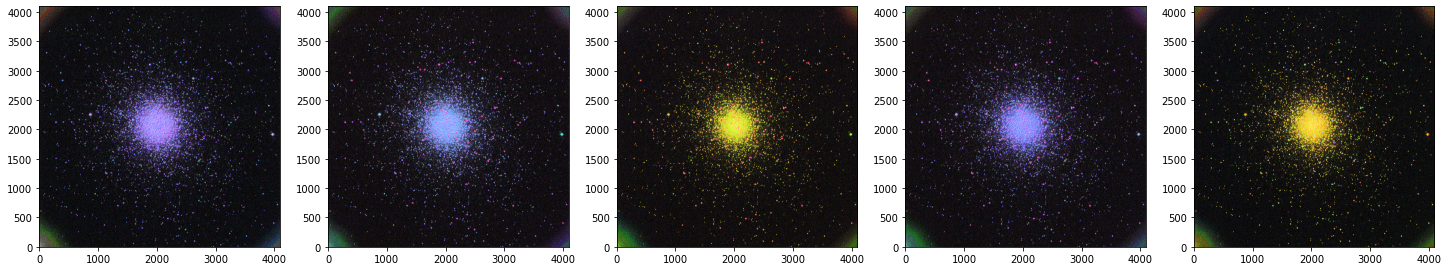

In [132]:
fig,ax=plt.subplots(1,5,figsize=(25,25))

ax[0].imshow(Tuca_RGB1,origin='lower')
ax[1].imshow(Tuca_RGB2,origin='lower')
ax[2].imshow(Tuca_RGB3,origin='lower')
ax[3].imshow(Tuca_RGB4,origin='lower')
ax[4].imshow(Tuca_RGB5,origin='lower')